# Assignment 3

> Joshua Schmidt (jns223)

In [2]:
import pandas as pd
import numpy as np

import librosa
import librosa.display

import matplotlib.pyplot as plt

import geopy
from geopy.geocoders import Nominatim
import plotly.graph_objects as go

from IPython.display import Audio

### Load data

In [3]:
# Here are the sample code to load the three types of data. Change it based on your needs. 

location_dir = "./data/person2-1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.absolute_locations.csv.gz"
location = pd.read_csv(location_dir, compression='gzip')

feature_label_dir = "./data/person2-1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.features_labels.csv.gz"
feature_label = pd.read_csv(feature_label_dir, compression='gzip')



### Inspect data

In [4]:
location

,timestamp,latitude,longitude
0,1440627472,32.882277,-117.234632
1,1440627533,32.882289,-117.234622
2,1440627593,32.882289,-117.234629
3,1440627654,32.882292,-117.234630
4,1440627712,32.882284,-117.234628
...,...,...,...
7370,1441292839,32.878956,-117.231589
7371,1441292931,32.878955,-117.231589
7372,1441292959,32.878956,-117.231589
7373,1441293052,32.878956,-117.231589


In [5]:
feature_label

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1440627472,0.978119,0.002341,0.002273,0.005612,0.976953,0.978090,0.979302,1.296142,6.684609,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4
1,1440627533,0.978315,0.001636,0.000510,0.002482,0.977402,0.978380,0.979202,2.174581,6.684610,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4
2,1440627593,0.978582,0.002582,-0.002260,0.004173,0.977297,0.978632,0.980001,2.162259,6.684608,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4
3,1440627654,0.978640,0.001695,-0.000799,0.002433,0.977607,0.978664,0.979654,2.282570,6.684610,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4
4,1440627712,0.978938,0.001981,0.001092,0.003347,0.977863,0.978961,0.979923,1.968584,6.684610,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,1441292839,1.014379,0.001043,0.000587,0.001415,1.013690,1.014335,1.015096,2.438258,6.684611,...,NaN,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1
7371,1441292931,1.013954,0.001003,0.000501,0.001301,1.013225,1.013953,1.014676,2.625195,6.684611,...,NaN,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1
7372,1441292959,1.014174,0.000964,-0.000307,0.001276,1.013541,1.014194,1.014796,2.497071,6.684611,...,NaN,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1
7373,1441293052,1.014009,0.001029,-0.000293,0.001391,1.013350,1.013978,1.014709,2.467187,6.684611,...,NaN,NaN,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1


### remove NaN

In [11]:
location.isna().sum()

timestamp      0
latitude     515
longitude    515
dtype: int64

In [14]:
newlocation = location.interpolate(method='linear', axis=0).ffill().bfill()
print(newlocation.isna().sum())
newlocation


timestamp    0
latitude     0
longitude    0
dtype: int64


,timestamp,latitude,longitude
0,1440627472,32.882277,-117.234632
1,1440627533,32.882289,-117.234622
2,1440627593,32.882289,-117.234629
3,1440627654,32.882292,-117.234630
4,1440627712,32.882284,-117.234628
...,...,...,...
7370,1441292839,32.878956,-117.231589
7371,1441292931,32.878955,-117.231589
7372,1441292959,32.878956,-117.231589
7373,1441293052,32.878956,-117.231589


In [15]:
location = newlocation

### overlay on map

In [16]:
fig = go.Figure(go.Densitymapbox(lat=location.latitude, lon=location.longitude,
                                 radius=5))
avg_lat, avg_lon = np.mean(location.latitude), np.mean(location.longitude)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=avg_lon)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title = "Locations")
fig.show()


This person spent some time in the park at Costa Mesa. They drove along the San Diego Freeway and stopped at Irvine, where it looks like they waited for and took a light rail to San Juan. They continued on the light rail through Doheny State Beach and along the Pacific Coast Highway to Oceanside, where they stopped for a bit and waited for new passengers. They then continued to Solana Beach, their destination. In Solana Beach they hopped on a car or bus and headed down highway 101 to San Diego. They ended up at UC San Diego, where they spent some time walking around on campus, going to the various buildings, and making a trip to Trader Joe's for some food. They also went to visit a friend off campus in University City, which was pretty close to campus. To get to Trader Joe's it looks like they walked, but to the friend's house it looks like they drove and got slightly lost. Most likely they had too many things to carry from shopping and ordered an Uber or something.

In [23]:
in_car_sitting = feature_label.loc[feature_label['label:IN_A_CAR'].eq(1) & feature_label['label:SITTING'].eq(1)]
print('In car sitting:', len(in_car_sitting))

sitting_surfing = feature_label.loc[feature_label['label:SURFING_THE_INTERNET'].eq(1) & feature_label['label:SITTING'].eq(1)]
print('Sitting surfing internet:', len(sitting_surfing))


In car sitting: 36
Sitting surfing internet: 796


### naive classifier surfing internet or driving

In [35]:
accel_cols = [l for l in list(feature_label) if l.startswith('raw_acc:')]

accel_cols

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

rand_state = 42

driving_data = in_car_sitting[accel_cols]
surfing_data = sitting_surfing[accel_cols]
X = pd.concat([driving_data, surfing_data])
y = np.concatenate([np.zeros(len(driving_data)), np.ones(len(surfing_data))])

gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand_state)

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy of naive bayes classifier:', accuracy_score(y_test, y_pred))

accuracy of naive bayes classifier: 0.9759615384615384


The accuracy of this naive bayes classifier is very high, at 0.976. This is likely due to overfitting, as there are only 36 data points of the person sitting in the car and driving. It would be interesting to see if you would get the same results for a second person as well.

### distance travelled

In [66]:
import geopy.distance

driving_locations = location.loc[location['timestamp'].isin(in_car_sitting['timestamp'])]

driving_distances = [0]

last_row = None
for index, row in driving_locations.iterrows():
  if last_row is None:
    last_row = row
    continue

  prev_coords = last_row['latitude'], last_row['longitude']
  curr_coords = row['latitude'], row['longitude']
  distance = geopy.distance.geodesic(prev_coords, curr_coords).m
  driving_distances.append(distance)

  last_row = row

sorted(driving_distances)


[0,
 2.7744589817457035,
 5.488644107912544,
 6.15674568869783,
 18.733618019160968,
 29.52663933972229,
 92.88333530947557,
 135.144501768939,
 135.1447419718738,
 135.14498216927285,
 153.8707094159332,
 180.62687104966113,
 675.2745849094122,
 708.990292204785,
 729.8964279851472,
 729.8969603829447,
 729.8974928348063,
 729.8980253446023,
 729.8985579098505,
 729.8990905322992,
 729.899623209466,
 729.9001559452238,
 743.9948928008101,
 1090.8903142322233,
 1131.8747682798428,
 1292.566476764023,
 1452.107032065051,
 1470.2473217762185,
 1543.9954379164212,
 1559.7693640616005,
 1783.34054857259,
 2324.909420615315,
 2638.61943380624,
 2657.69551163442,
 3069.6220045857267,
 95559.42208817323]

In [67]:
driving_threshold = 3500

for i, distance in enumerate(driving_distances):
  if distance > driving_threshold:
    driving_distances[i] = 0

driving_distances

[0,
 708.990292204785,
 1470.2473217762185,
 2657.69551163442,
 1452.107032065051,
 1090.8903142322233,
 3069.6220045857267,
 1131.8747682798428,
 743.9948928008101,
 1783.34054857259,
 1543.9954379164212,
 675.2745849094122,
 180.62687104966113,
 6.15674568869783,
 2.7744589817457035,
 5.488644107912544,
 29.52663933972229,
 0,
 2638.61943380624,
 1292.566476764023,
 2324.909420615315,
 1559.7693640616005,
 729.9001559452238,
 729.899623209466,
 729.8990905322992,
 729.8985579098505,
 729.8980253446023,
 729.8974928348063,
 729.8969603829447,
 729.8964279851472,
 153.8707094159332,
 135.14498216927285,
 135.1447419718738,
 135.144501768939,
 18.733618019160968,
 92.88333530947557]

After inspecting the driving data, I set the threshold to 3500m, or 3.5km. I chose this value because after sorting the distances, all of the values seemed to be linearly increasing and reasonably close to one another except for the largest value, at 95.560km. That was a significantly larger value than the next highest at 3km, so I set the threshold at slightly higher than the second highest value.

In [ ]:
import geopy.distance

surfing_locations = location.loc[location['timestamp'].isin(sitting_surfing['timestamp'])]

surfing_distances = [0]

last_row = None
for index, row in surfing_locations.iterrows():
  if last_row is None:
    last_row = row
    continue

  prev_coords = last_row['latitude'], last_row['longitude']
  curr_coords = row['latitude'], row['longitude']
  distance = geopy.distance.geodesic(prev_coords, curr_coords).m
  surfing_distances.append(distance)

  last_row = row


In [ ]:
surfing_threshold = 5

for i, distance in enumerate(surfing_distances):
  if distance > surfing_threshold:
    surfing_distances[i] = 0

When inspecting the sorted surfing data, I found most of distances to be less than 1 meter. When increased to 5 meters, this represents 615 / 795 samples. I chose this number because it represents most of the data, and the distances should be close to 0.

### classifier

In [74]:
# ignore warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

driving_data = in_car_sitting[accel_cols]
driving_data['distance'] = driving_distances
surfing_data = sitting_surfing[accel_cols]
surfing_data['distance'] = surfing_distances

X = pd.concat([driving_data, surfing_data])
y = np.concatenate([np.zeros(len(driving_data)), np.ones(len(surfing_data))])

gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand_state)

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy of naive bayes classifier:', accuracy_score(y_test, y_pred))

accuracy of naive bayes classifier: 0.9807692307692307


After adding this distance column and normalizing it (removing any outliers), the accuracy of the model increased from 0.976 to 0.981, which is a small but noticeable improvement. The accuracy of both models is very high, and again may be due to overfitting. However, it is able to correctly characterize this simple two-category system, so maybe it will be accurate with other datasets as well.

## Audio

### get samples

In [129]:
sitting_eating = feature_label.loc[feature_label['label:SITTING'].eq(1) & feature_label['label:EATING'].eq(1)]
print('Sitting eating:', len(sitting_eating))

sitting_working = feature_label.loc[feature_label['label:SITTING'].eq(1) & feature_label['label:COMPUTER_WORK'].eq(1)]
print('Sitting computer work:', len(sitting_working))

Sitting eating: 425
Sitting computer work: 1622


### show location

In [84]:
geolocator = Nominatim(user_agent="http")

#### Eating Locations

In [83]:
eating_locations = location.loc[location['timestamp'].isin(sitting_eating['timestamp'])]
eating_locations

,timestamp,latitude,longitude
364,1440651089,32.878951,-117.231531
365,1440651171,32.878947,-117.231530
366,1440651214,32.878943,-117.231530
367,1440651276,32.878943,-117.231529
368,1440651352,32.878939,-117.231532
...,...,...,...
6372,1441230624,32.878962,-117.231519
6373,1441230685,32.878962,-117.231521
6374,1441230749,32.878961,-117.231521
6375,1441230804,32.878961,-117.231522


In [80]:
fig = go.Figure(go.Densitymapbox(lat=eating_locations.latitude, lon=eating_locations.longitude,
                                 radius=5))
avg_lat, avg_lon = np.mean(eating_locations.latitude), np.mean(eating_locations.longitude)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=avg_lon)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title = "Eating Locations")
fig.show()


In [88]:
clusters = [(33.667241, -117.899997), (33.446898, -117.652734), (33.088184, -117.309919), \
            (32.879628552, -117.233454544), (32.869896, -117.233372), (32.864965, -117.232524)]

for i, (lat, lng) in enumerate(clusters):
  location_data = geolocator.reverse(f"{lat},{lng}")
  print(f'location {i + 1}:', location_data)


location 1: OC Promenade, 1050, Arlington Drive, Costa Mesa, Orange County, California, 92626, United States
location 2: 35581, Beach Road, Capistrano Beach, Dana Point, Orange County, California, 92624, United States
location 3: Leucadia, Encinitas, San Diego County, California, 92011, United States
location 4: University of California, San Diego, 9500, Gilman Drive, University City, San Diego, San Diego County, California, 92093, United States
location 5: 3211, Holiday Court, San Diego, San Diego County, California, 92037, United States
location 6: La Jolla Village Square Shopping Center, 8657, Villa La Jolla Drive, La Jolla Colony, San Diego, San Diego County, California, 92037, United States


I did manual clustering to find these regions of interest. The addresses of the six centroids are shown above. Some of these centroids are along highways / roads, signalling that the person was either driving or walking around while eating. Then there are centroids in UC San Diego and Costa Mesa, showing that this person was eating while studying and at the park. Looking at the map and centroids together, it is clear that the main areas this person is eating is in the car traveling, when studying and when at the park.

#### working locations

In [81]:
working_locations = location.loc[location['timestamp'].isin(sitting_working['timestamp'])]
working_locations

,timestamp,latitude,longitude
391,1440652787,32.878937,-117.231535
392,1440652843,32.878937,-117.231535
393,1440652905,32.878937,-117.231535
394,1440652965,32.878937,-117.231535
395,1440653047,32.878936,-117.231536
...,...,...,...
6985,1441267956,32.878963,-117.231529
6986,1441267979,32.878962,-117.231529
6987,1441268169,32.878962,-117.231530
6988,1441268228,32.878962,-117.231530


In [82]:
fig = go.Figure(go.Densitymapbox(lat=working_locations.latitude, lon=working_locations.longitude,
                                 radius=5))
avg_lat, avg_lon = np.mean(working_locations.latitude), np.mean(working_locations.longitude)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=avg_lon)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title = "Working Locations")
fig.show()


In [89]:
clusters = [(32.881075, -117.238147), (32.881964, -117.240459), (32.8803604, -117.2363628), \
            (32.87998685, -117.23503884), (32.87949695, -117.233306), (32.87902, -117.231626), \
            (32.879414, -117.235188)]

for i, (lat, lng) in enumerate(clusters):
  location_data = geolocator.reverse(f"{lat},{lng}")
  print(f'location {i + 1}:', location_data)

location 1: Geisel Library, Library Walk, University Center, Torrey Pines, San Diego, San Diego County, California, 92093-0068, United States
location 2: Economics Building, Ridge Walk, Thurgood Marshall College, Torrey Pines, San Diego, San Diego County, California, 92093, United States
location 3: University of California, San Diego, 9500, Gilman Drive, University City, San Diego, San Diego County, California, 92093, United States
location 4: University of California, San Diego, 9500, Gilman Drive, University City, San Diego, San Diego County, California, 92093, United States
location 5: University of California, San Diego, 9500, Gilman Drive, University City, San Diego, San Diego County, California, 92093, United States
location 6: A, Innovation Lane, Pepper Canyon, San Diego, San Diego County, California, 92093-0068, United States
location 7: University of California, San Diego, 9500, Gilman Drive, University City, San Diego, San Diego County, California, 92093, United States


Looking at the above cluster centroids, computer work is done exclusively in UC San Diego. Some work is done outside in the park by the Geisel Library, while other work is done in the Science and Engineering or Structural and Mechanical Engineering buildings. Work is also done in some smaller buildings scattered throughout campus. This person presumably was using a laptop to go to these different places to work.

#### Audio

In [96]:
mfcc_extension = ".sound.mfcc"
mfcc = "./data/person2-MFCC-1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842/"

def get_audio_data(timestamp):
  df = pd.read_csv(mfcc + str(timestamp) + mfcc_extension, sep=",", header=None, )
  df = df.drop(columns=[13])
  mfcc_coeff = df.T.to_numpy()
  return mfcc_coeff

get_audio_data(1440652787)


array([[-8.24621125e+01, -9.93218702e+00, -4.97305810e+00, ...,
         2.14531050e+00,  2.66927492e+00,  1.51974319e+00],
       [ 8.61659633e-16, -1.19795986e+00, -1.28985223e+00, ...,
        -5.51409700e-01, -9.40378632e-01, -6.41590596e-01],
       [-4.30829816e-16,  5.51628363e-01,  5.65086712e-01, ...,
         6.14282306e-01,  5.58024678e-01,  8.11163369e-01],
       ...,
       [ 5.16995780e-15, -2.67070573e-01, -2.49183667e-01, ...,
        -1.69268257e-01, -3.08869254e-01, -2.23282110e-01],
       [ 8.18576651e-15, -1.13510040e-01, -1.27752455e-01, ...,
        -1.50372953e-01, -1.58451437e-01, -1.95369635e-01],
       [-1.16324050e-14,  2.10808326e-01,  1.17075395e-01, ...,
        -3.44395678e-04,  3.65590400e-02, -4.13183255e-02]])

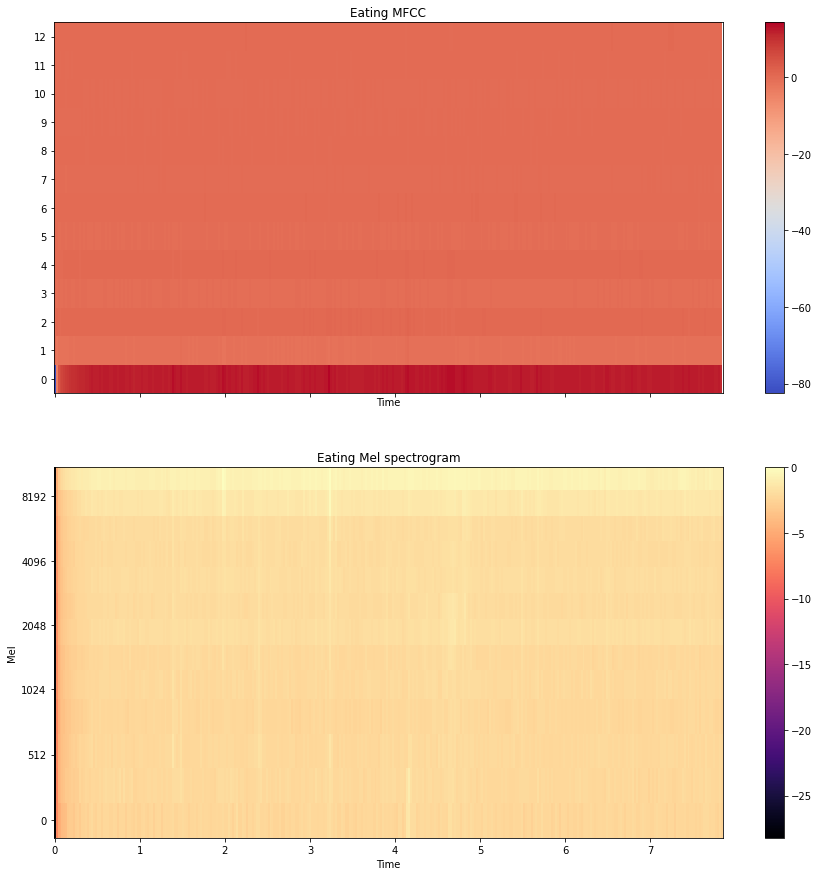

In [99]:
timestamp = 1440651352

mfcc_coeff = get_audio_data(timestamp)
mel_data = librosa.feature.inverse.mfcc_to_mel(mfcc_coeff, n_mels=13)

plt.rcParams["figure.figsize"] = (15, 15)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(mel_data, ref=np.max), sr = 22000, 
                               x_axis='time', y_axis='mel', fmax=10000,
                               ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='Eating Mel spectrogram')
ax[1].label_outer()
ax[1].set_ylabel('Mel')


img = librosa.display.specshow(mfcc_coeff, x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Eating MFCC')
ax[0].set_yticks(np.linspace(0, 12, 13))


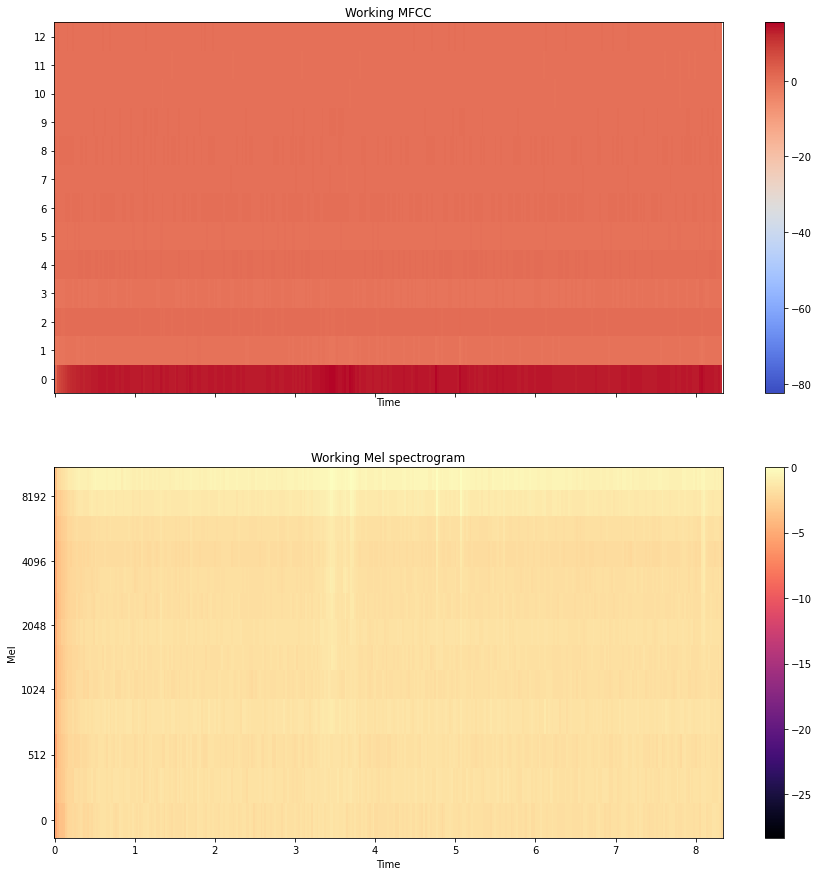

In [98]:
timestamp = 1440653047

mfcc_coeff = get_audio_data(timestamp)
mel_data = librosa.feature.inverse.mfcc_to_mel(mfcc_coeff, n_mels=13)

plt.rcParams["figure.figsize"] = (15, 15)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(mel_data, ref=np.max), sr = 22000, 
                               x_axis='time', y_axis='mel', fmax=10000,
                               ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='Working Mel spectrogram')
ax[1].label_outer()
ax[1].set_ylabel('Mel')


img = librosa.display.specshow(mfcc_coeff, x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Working MFCC')
ax[0].set_yticks(np.linspace(0, 12, 13))


#### classifiers

In [ ]:
eating_location_data = []

for _, curr_location in eating_locations.iterrows():
  lat = curr_location['latitude']
  lng = curr_location['longitude']
  location_data = geolocator.reverse(f"{lat},{lng}")
  eating_location_data.append(location_data)

In [101]:
df = pd.DataFrame(eating_location_data)
df.to_csv('eating_location_data.csv')

In [ ]:
working_location_data = []

for _, curr_location in working_locations.iterrows():
  lat = curr_location['latitude']
  lng = curr_location['longitude']
  location_data = geolocator.reverse(f"{lat},{lng}")
  working_location_data.append(location_data)

In [ ]:
df = pd.DataFrame(working_location_data)
df.to_csv('working_location_data.csv')

#### encode city

In [130]:
cities_eating = [el[0].split(',')[-5] for el in eating_location_data]
sitting_eating['city'] = cities_eating
print(sitting_eating['city'])

cities_working = [el[0].split(',')[-5] for el in working_location_data]
sitting_working['city'] = cities_working
print(sitting_working['city'])

all_encoded = pd.get_dummies(pd.concat([sitting_eating['city'], sitting_working['city']]))
all_encoded

364      San Diego
365      San Diego
366      San Diego
367      San Diego
368      San Diego
           ...    
6372     San Diego
6373     San Diego
6374     San Diego
6375     San Diego
6376     San Diego
Name: city, Length: 425, dtype: object
391      San Diego
392      San Diego
393      San Diego
394      San Diego
395      San Diego
           ...    
6985     San Diego
6986     San Diego
6987     San Diego
6988     San Diego
6989     San Diego
Name: city, Length: 1622, dtype: object


,Agra,Carlsbad,Costa Mesa,Dana Point,Encinitas,Oceanside,San Clemente,San Diego,San Juan Capistrano,Solana Beach,Torrey Pines,Encinitas
364,0,0,0,0,0,0,0,1,0,0,0,0
365,0,0,0,0,0,0,0,1,0,0,0,0
366,0,0,0,0,0,0,0,1,0,0,0,0
367,0,0,0,0,0,0,0,1,0,0,0,0
368,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6985,0,0,0,0,0,0,0,1,0,0,0,0
6986,0,0,0,0,0,0,0,1,0,0,0,0
6987,0,0,0,0,0,0,0,1,0,0,0,0
6988,0,0,0,0,0,0,0,1,0,0,0,0


In [148]:
curr_encoded = all_encoded.iloc[0: len(sitting_eating)]

location_sitting_eating = sitting_eating.join(curr_encoded)
location_sitting_eating = location_sitting_eating.drop('city', axis = 1)
location_sitting_eating

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,Costa Mesa,Dana Point,Encinitas,Oceanside,San Clemente,San Diego,San Juan Capistrano,Solana Beach,Torrey Pines,Encinitas
364,1440651089,0.969981,0.024200,0.018224,0.041288,0.959713,0.969943,0.979780,1.999294,6.684301,...,0,0,0,0,0,1,0,0,0,0
365,1440651171,0.973126,0.001047,-0.000596,0.001441,0.972483,0.973123,0.973814,2.472657,6.684611,...,0,0,0,0,0,1,0,0,0,0
366,1440651214,0.973005,0.001070,-0.000624,0.001499,0.972342,0.973035,0.973673,2.341777,6.684611,...,0,0,0,0,0,1,0,0,0,0
367,1440651276,0.973191,0.001023,-0.000470,0.001369,0.972524,0.973215,0.973904,2.419986,6.684611,...,0,0,0,0,0,1,0,0,0,0
368,1440651352,0.973705,0.001043,-0.000550,0.001382,0.972999,0.973745,0.974385,2.463549,6.684611,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,1441230624,0.978159,0.057358,0.055600,0.121728,0.962143,0.976692,0.988472,1.278916,6.682903,...,0,0,0,0,0,1,0,0,0,0
6373,1441230685,0.970195,0.012532,-0.006951,0.019416,0.963655,0.970648,0.976588,2.124745,6.684528,...,0,0,0,0,0,1,0,0,0,0
6374,1441230749,0.972170,0.023283,0.019654,0.038548,0.962927,0.970257,0.978569,1.952924,6.684326,...,0,0,0,0,0,1,0,0,0,0
6375,1441230804,0.973395,0.039125,0.044037,0.069762,0.955612,0.971782,0.989002,1.867990,6.683817,...,0,0,0,0,0,1,0,0,0,0


In [154]:
curr_encoded = all_encoded.iloc[len(sitting_eating):]

location_sitting_working = sitting_working.join(curr_encoded)
location_sitting_working = location_sitting_working.drop('city', axis = 1)
location_sitting_working

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,Costa Mesa,Dana Point,Encinitas,Oceanside,San Clemente,San Diego,San Juan Capistrano,Solana Beach,Torrey Pines,Encinitas
391,1440652787,0.981915,0.123744,0.196262,0.289781,0.963881,0.974787,0.979273,1.019330,6.677581,...,0,0,0,0,0,1,0,0,0,0
392,1440652843,0.978268,0.007662,-0.007976,0.014020,0.975242,0.978618,0.981514,1.862406,6.684581,...,0,0,0,0,0,1,0,0,0,0
393,1440652905,0.978518,0.003635,-0.001689,0.005214,0.976515,0.978534,0.980594,2.306569,6.684605,...,0,0,0,0,0,1,0,0,0,0
394,1440652965,0.974498,0.001502,-0.000660,0.002001,0.973573,0.974486,0.975519,2.578886,6.684611,...,0,0,0,0,0,1,0,0,0,0
395,1440653047,0.975216,0.001259,-0.000859,0.001683,0.974478,0.975278,0.976036,2.636655,6.684611,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,1441267956,0.981202,0.001351,-0.001001,0.001867,0.980383,0.981272,0.982141,2.466110,6.684611,...,0,0,0,0,0,1,0,0,0,0
6986,1441267979,0.987082,0.119474,0.201659,0.304354,0.964714,0.980208,0.988380,0.904069,6.678204,...,0,0,0,0,0,1,0,0,0,0
6987,1441268169,0.979582,0.001486,0.000683,0.001977,0.978601,0.979555,0.980577,2.551983,6.684611,...,0,0,0,0,0,1,0,0,0,0
6988,1441268228,0.979483,0.015567,0.019237,0.034301,0.977144,0.979314,0.981152,1.358389,6.684487,...,0,0,0,0,0,1,0,0,0,0


#### geoencoding model

In [156]:
# acceleration and city
cols = [*accel_cols, *list(all_encoded)]

eating_data = location_sitting_eating[cols]
working_data = location_sitting_working[cols]

X = pd.concat([eating_data, working_data])
y = np.concatenate([np.zeros(len(eating_data)), np.ones(len(working_data))])

gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand_state)

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy of naive bayes classifier:', accuracy_score(y_test, y_pred))

accuracy of naive bayes classifier: 0.818359375


#### mfcc get data

In [211]:
mfcc_data_arr = []

for _, row in sitting_eating.iterrows():
  timestamp = row['timestamp']
  mfcc_coeff = get_audio_data(timestamp)

  flat_data = mfcc_coeff.flatten()
  mfcc_data_arr.append(flat_data)

mfcc_eating_df = pd.DataFrame(mfcc_data_arr).fillna(0)

curr_data = sitting_eating.reset_index(drop=True)

mfcc_eating_data = pd.concat([curr_data, mfcc_eating_df], axis=1)

mfcc_eating_data

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,14966,14967,14968,14969,14970,14971,14972,14973,14974,14975
0,1440651089,0.969981,0.024200,0.018224,0.041288,0.959713,0.969943,0.979780,1.999294,6.684301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1440651171,0.973126,0.001047,-0.000596,0.001441,0.972483,0.973123,0.973814,2.472657,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1440651214,0.973005,0.001070,-0.000624,0.001499,0.972342,0.973035,0.973673,2.341777,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1440651276,0.973191,0.001023,-0.000470,0.001369,0.972524,0.973215,0.973904,2.419986,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1440651352,0.973705,0.001043,-0.000550,0.001382,0.972999,0.973745,0.974385,2.463549,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1441230624,0.978159,0.057358,0.055600,0.121728,0.962143,0.976692,0.988472,1.278916,6.682903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,1441230685,0.970195,0.012532,-0.006951,0.019416,0.963655,0.970648,0.976588,2.124745,6.684528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,1441230749,0.972170,0.023283,0.019654,0.038548,0.962927,0.970257,0.978569,1.952924,6.684326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,1441230804,0.973395,0.039125,0.044037,0.069762,0.955612,0.971782,0.989002,1.867990,6.683817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
# no data for timestamp 5389
no_data = [1441156901]
mfcc_data_arr = []

for i, row in sitting_working.iterrows():
  timestamp = row['timestamp']
  if timestamp in no_data:
    continue
  mfcc_coeff = get_audio_data(timestamp)

  flat_data = mfcc_coeff.flatten()
  mfcc_data_arr.append(flat_data)

mfcc_working_df = pd.DataFrame(mfcc_data_arr).fillna(0)

curr_data = sitting_working.drop(sitting_working[sitting_working['timestamp'].isin(no_data)].index).reset_index(drop=True)

mfcc_working_data = pd.concat([curr_data, mfcc_working_df], axis=1)

mfcc_working_data

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,11365,11366,11367,11368,11369,11370,11371,11372,11373,11374
0,1440652787,0.981915,0.123744,0.196262,0.289781,0.963881,0.974787,0.979273,1.019330,6.677581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1440652843,0.978268,0.007662,-0.007976,0.014020,0.975242,0.978618,0.981514,1.862406,6.684581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1440652905,0.978518,0.003635,-0.001689,0.005214,0.976515,0.978534,0.980594,2.306569,6.684605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1440652965,0.974498,0.001502,-0.000660,0.002001,0.973573,0.974486,0.975519,2.578886,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1440653047,0.975216,0.001259,-0.000859,0.001683,0.974478,0.975278,0.976036,2.636655,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1441267956,0.981202,0.001351,-0.001001,0.001867,0.980383,0.981272,0.982141,2.466110,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1617,1441267979,0.987082,0.119474,0.201659,0.304354,0.964714,0.980208,0.988380,0.904069,6.678204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1618,1441268169,0.979582,0.001486,0.000683,0.001977,0.978601,0.979555,0.980577,2.551983,6.684611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1619,1441268228,0.979483,0.015567,0.019237,0.034301,0.977144,0.979314,0.981152,1.358389,6.684487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### mfcc model

In [212]:
# acceleration and mfcc data

cols = [*accel_cols, *list(mfcc_eating_df)]
eating_data = mfcc_eating_data[cols]
cols = [*accel_cols, *list(mfcc_working_df)]
working_data = mfcc_working_data[cols]

X = pd.concat([eating_data, working_data]).fillna(0)
y = np.concatenate([np.zeros(len(eating_data)), np.ones(len(working_data))])

gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand_state)

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy of naive bayes classifier:', accuracy_score(y_test, y_pred))

/home/joshua/Desktop/cornell/ubicomp/hw/a3/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



accuracy of naive bayes classifier: 0.7771260997067448


/home/joshua/Desktop/cornell/ubicomp/hw/a3/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



The two models performed fairly similarly, with the geoencoded model being $0.818\%$ accurate and the mfcc model being $0.777\%$ accurate. The geoencoding model only used the name of the city that the user was in, while the mfcc model used all of the data from the audio samples. The mfcc model likely did not have as good performance for a number of reasons. First, there is usually a lot of noise in these samples that we are not filtering out, and while we are trying to get ambient noise, this data could be processed further to distill the signal that has the best representation of this noise. For the geoencoding model, we are again only using the city as an attribute, which is not ideal in this classification model. Ideally, we would use the type of location, whether it is a park, an office, a restaurant or a cafeteria. Classifying the locations into these categories is a different problem in itself, which is why I thought it was out of scope for this assignment. I think that the geoencoded model would be better to continue with for future exploration, despite the audio model also showing some promise.